In [1]:
import pickle
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, load_model

Using TensorFlow backend.


In [ ]:
landmark_dim = 2

# Load data
with open('all_data.pkl', 'rb') as f:
    images_train, images_test, ldmks_2d_train, ldmks_2d_test, ldmks_3d_train, ldmks_3d_test, head_pose_train, head_pose_test = pickle.load(f)

num_samples = images_test.shape[0]

# Load the saved model
model = load_model('landmark_cnn.h5')

In [3]:
# Evaluate the model on the test data
pred_landmarks = model.predict({'input_img': images_test, 'head_pose': head_pose_test})


TypeError: reshape() missing 1 required positional argument: 'newshape'

In [66]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_img (InputLayer)           (None, 3, 80, 120)    0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 64, 80, 120)   256         input_img[0][0]                  
____________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)   (None, 64, 80, 120)   0           conv2d_1[0][0]                   
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 64, 80, 64)    69184       max_pooling2d_1[0][0]            
___________________________________________________________________________________________

In [16]:
pred_landmarks = np.reshape(pred_landmarks, (num_samples, 28,landmark_dim))
ldmks_2d_test = np.reshape(ldmks_2d_test, (num_samples, 28,landmark_dim))

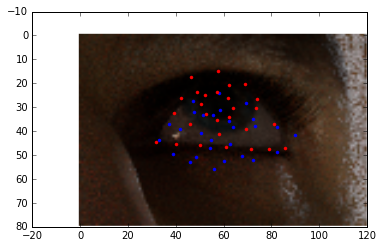

In [58]:
i = np.random.choice(num_samples)
pred_landmarks[i,:,:]
plt.imshow(images_test[i,:,:,:].reshape((80,120,3)))
plt.plot(pred_landmarks[i,:,0], pred_landmarks[i,:,1], '.b')
plt.plot(ldmks_2d_test[i,:,0], ldmks_2d_test[i,:,1], '.r')
plt.show()